In [1]:
#Bayes Testing Curveball V Slider Homeruns
#Sliders are not hits at a greater rate than curveballs

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
import pandas as pd

CB=pd.read_csv('Data/Pitches/changeup.csv')
SL=pd.read_csv('Data/Pitches/Slider.csv')

def cleandata(dat):
    
    
    dat["HNH"] =[1 if x =='single' or x =='double' or x =='triple' or x =='home_run' else 0 for x in dat["events"]]
        
        
        
     
    
    
    return dat 
    
    
       
    
    

    
    
    
    
    
    
    
    
    
    
#cb_nothit =cleandatanot(CB)   
    
cb_hits= cleandata(CB)




sl_hits =cleandata(SL)



cb_hits = cleandata(CB)


cb_hits_cl = cb_hits["HNH"]

sl_hits_cl = sl_hits["HNH"]


cb_hits_cl

0        0
1        0
2        1
3        1
4        0
        ..
16001    0
16002    1
16003    0
16004    0
16005    0
Name: HNH, Length: 16006, dtype: int64

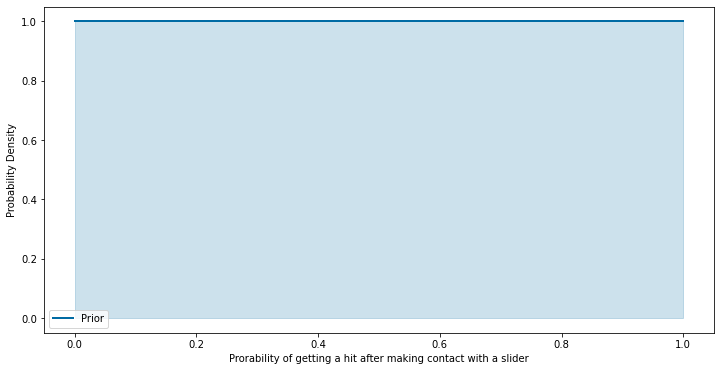

In [2]:
x = np.arange(0, 1.01, 0.01)

y = stats.uniform(0, 1).pdf(x)

def plot_with_fill(ax, x, y, label):
    lines = ax.plot(x, y, label=label, lw=2)
    ax.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())
    ax.set_xlabel('Prorability of getting a hit after making contact with a slider')
    ax.set_ylabel('Probability Density')

fig, ax = plt.subplots(figsize=(12, 6))

plot_with_fill(ax, x, y, "Prior")
ax.legend()

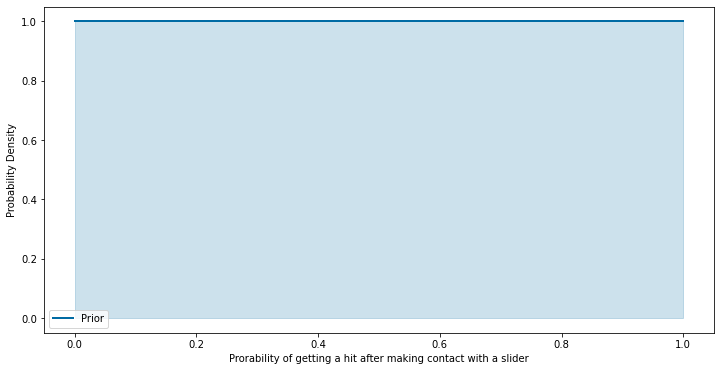

In [3]:
#pS
y = stats.beta(a=1, b=1).pdf(x)

fig, ax = plt.subplots(figsize=(12, 6))

plot_with_fill(ax, x, y, "Prior")
ax.legend()




(50,)
16


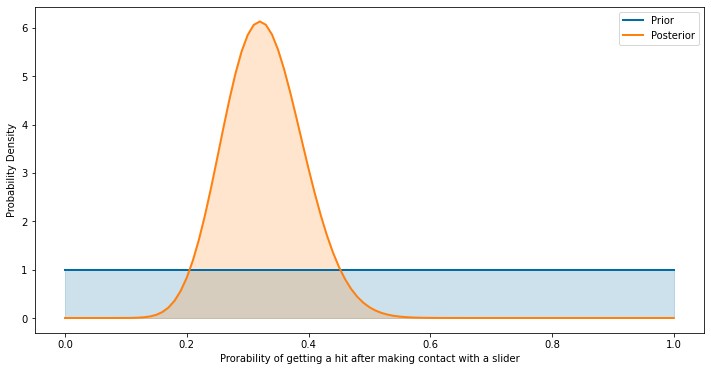

In [4]:
#after 50 samples
print(sl_hits_cl[:50].shape)
print(sl_hits_cl[:50].sum())

alpha = sl_hits_cl[:50].sum()

beta = 50 - alpha

y2 = stats.beta(a=1+alpha, b=1+beta).pdf(x)

fig, ax = plt.subplots(figsize=(12, 6))
plot_with_fill(ax, x, y, "Prior")
plot_with_fill(ax, x, y2, "Posterior")
ax.legend();

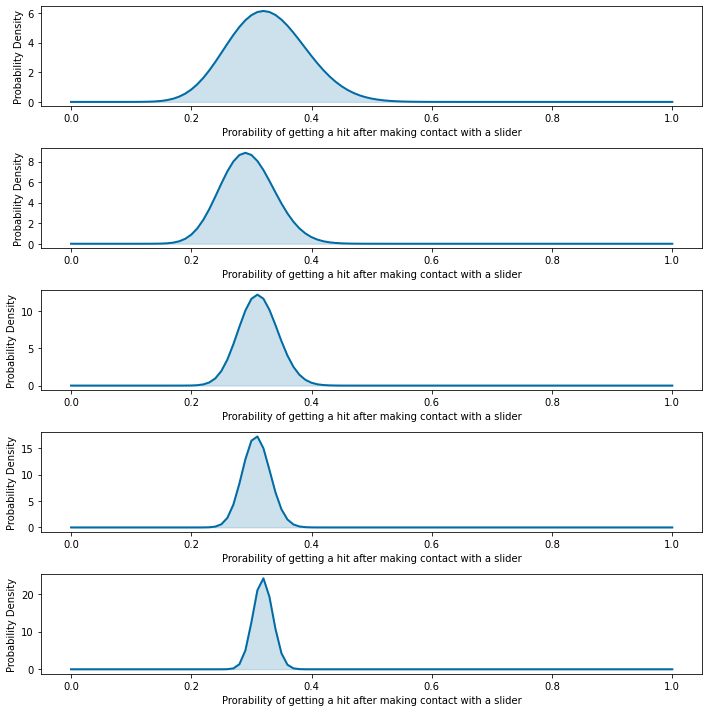

In [5]:
fig, axes = plt.subplots(5, 1, figsize=(10,10))

a1 = sl_hits_cl[:50].sum()
b1 = 50 - a1

a2 = sl_hits_cl[:100].sum()
b2 = 100 - a2

a3 = sl_hits_cl[:200].sum()
b3 = 200 - a3

a4 = sl_hits_cl[:400].sum()
b4 = 400 - a4

a5 = sl_hits_cl[:800].sum()
b5 = 800 - a5


plot_with_fill(axes[0], x, stats.beta(a=1+a1, b=1+b1).pdf(x), '50 views')


plot_with_fill(axes[1], x, stats.beta(a=1+a2, b=1+b2).pdf(x), '100 views')


plot_with_fill(axes[2], x, stats.beta(a=1+a3, b=1+b3).pdf(x), '200 views')


plot_with_fill(axes[3], x, stats.beta(a=1+a4, b=1+b4).pdf(x), '400 views')


plot_with_fill(axes[4], x, stats.beta(a=1+a5, b=1+b5).pdf(x), '800 views')

plt.tight_layout();


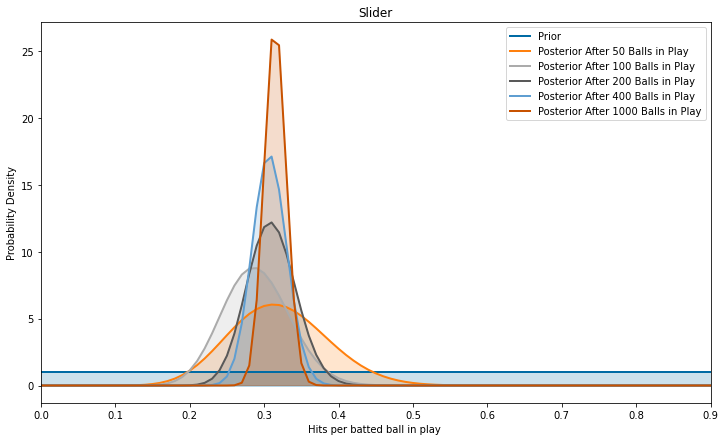

In [6]:

fig, ax = plt.subplots(figsize=(12,7))

# Let's do this all in one step to make graphing this more managable
views = [50, 100, 200, 400, 1000]

# Create our y_a for each view count in views
y_a = [stats.beta(a=sl_hits_cl[:view].sum(), b=view - sl_hits_cl[:view].sum()).pdf(x) for view in views]

# Create the labels for passing to the plot_with_fill function
labels = ['Posterior After {} Balls in Play'.format(view) for view in views]

# Now let's actually plot all these at once
plot_with_fill(ax, x, y, 'Prior')

for y, label in zip(y_a, labels):
    plot_with_fill(ax, x, y, label)
    plt.title('Slider')

plt.xlabel('Hits per batted ball in play ')
plt.xlim([0, 0.9])
ax.legend();

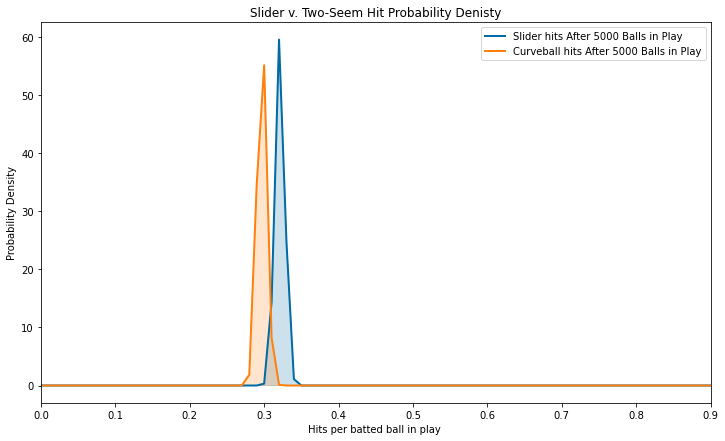

In [7]:
fig, ax = plt.subplots(figsize=(12,7))

# Let's do this all in one step to make graphing this more managable
views = [ 5000]

# Create our y_a for each view count in views
y_a = [stats.beta(a=sl_hits_cl[:view].sum(), b=view - sl_hits_cl[:view].sum()).pdf(x) for view in views]

# Create the labels for passing to the plot_with_fill function
labels = ['Slider hits After {} Balls in Play'.format(view) for view in views]

# Now let's actually plot all these at once
#plot_with_fill(ax, x, y, 'Prior')

for y, label in zip(y_a, labels):
    plot_with_fill(ax, x, y, label)
    plt.title('Slider')
y_b = [stats.beta(a=cb_hits_cl[:view].sum(), b=view - cb_hits_cl[:view].sum()).pdf(x) for view in views]    
labels2 = ['Curveball hits After {} Balls in Play'.format(view) for view in views]  
for y2, label in zip(y_b, labels2):
    plot_with_fill(ax, x, y2, label)
    plt.title('Slider v. Two-Seem Hit Probability Denisty')

plt.xlabel('Hits per batted ball in play ')
plt.xlim([0, 0.9])
ax.legend();



In [8]:
#monte Calro Simulation
cb_samp=cb_hits_cl[:1000]
sl_samp =sl_hits_cl[:1000]


In [9]:
curvetest = np.random.beta(a=sum(cb_samp), b=1000-sum(cb_samp), size=50000)
slidertest = np.random.beta(a=sum(sl_samp), b=1000-sum(sl_samp), size=50000)

In [10]:
prob = (slidertest > curvetest).mean() * 100

In [12]:
print(
    'There is a {:.2f}% probability that a Slider will result in a hit compared to a Changeup '.format(prob))

There is a 96.18% probability that a Slider will result in a hit compared to a Changeup 


In [ ]:
# After 50000 Monter Carlo 